<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_phw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyclustering

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


[0 5 0 ... 2 2 2]


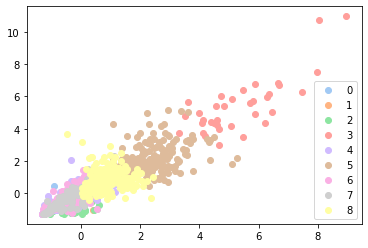

In [84]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()


# # Checking for the labels in the categorical parameters 
# print(df['ocean_proximity'].unique())

# #Checking for the label counts in the categorical parameters 
# df['ocean_proximity'].value_counts()

# df3 = pd.get_dummies(df, columns = ['ocean_proximity'])



# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

df2 = df.drop(df.index[3000:20000])


# scale features
scaler = StandardScaler()
model = scaler.fit(df2)
df_standard = model.transform(df2)
# print(df_standard,'\n\n')

# # scale features
# scaler = MinMaxScaler()
# model=scaler.fit(df_standard)
# df_minmax=model.transform(df_standard)
# # print(df_minmax,'\n\n')

# # scale features
# scaler = MaxAbsScaler()
# model=scaler.fit(df_minmax)
# df_maxabs=model.transform(df_minmax)
# # print(df_maxabs,'\n\n\n')

# # scale features
# scaler = RobustScaler()
# model=scaler.fit(df_maxabs)
# df_robust=model.transform(df_maxabs)
# # print(df_robust,'\n\n\n')

# # scale features
# df_normalize = (df_robust - df_robust.min())/ (df_robust.max() - df_robust.min())


#Initialize the class object
kmeans = KMeans(n_clusters= 9)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_standard)
 
print(label)


#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
# 3 means 3rd array = total_rooms and 6 means 6th array = households
for i in u_labels:
    plt.scatter(df_standard[label == i , 4] , df_standard[label == i , 5] , label = i)
plt.legend()
plt.show()

[0 3 0 ... 0 0 1]


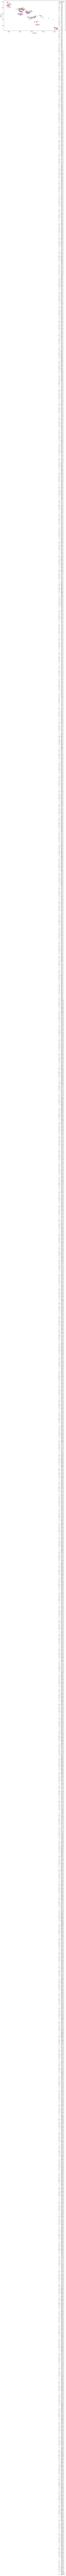

In [84]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

df1 = df.drop(df.index[3000:20000])



# scale features
df_normalize = (df_robust - df_robust.min())/ (df_robust.max() - df_robust.min())


# Building KMeans model with K=4 (Training and Predicting)
# Instantiating
kmeans4 = KMeans(n_clusters = 4)

# Training the model
kmeans4.fit(df1)

# predicting
y_pred = kmeans4.fit_predict(df1)
print(y_pred)

# Storing the y_pred values in a new column
df1['Cluster'] = y_pred+1 #to start the cluster number from 1

plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=df1['longitude'], y = df1['latitude'], hue=df1['population'],palette='bright')


# # generate some data
# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components = 3)
# # Fit the GMM model for the dataset
# # which expresses the dataset as a
# # mixture of 3 Gaussian Distribution
# gmm.fit(df)

# # Assign a label to each sample
# labels = gmm.predict(df)

# df['labels']= labels
# d0 = df[df['labels']== 0]
# d1 = df[df['labels']== 1]
# d2 = df[df['labels']== 2]
 
# # plot three clusters in same plot
# plt.scatter(d0.iloc[0], d0.iloc[5], c ='r')
# plt.scatter(d1.iloc[0], d1.iloc[5], c ='yellow')
# plt.scatter(d2.iloc[0], d2.iloc[5], c ='g')


CPU times: user 23.3 s, sys: 73.5 ms, total: 23.3 s
Wall time: 23.5 s


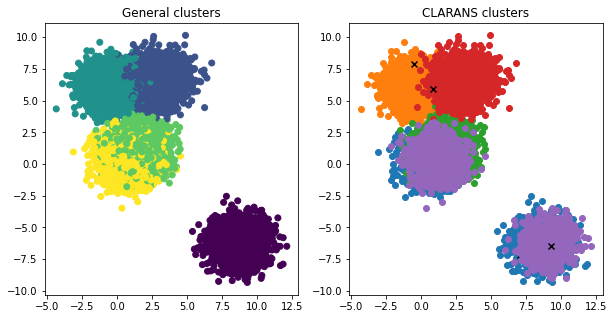

In [11]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())




df.median_house_value


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())

# Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['housing_median_age', 'median_income']
print(X_principal.head())

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_


# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='r');
g = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='g');
b = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='b');
k = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()


colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[0])
g = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[1])
b = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[2])
c = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[3])
y = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[4])
m = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[5])
k = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ','Label 4',
			'Label 5', 'Label -1'),
		scatterpoints = 1,
		loc ='upper left',
		ncol = 3,
		fontsize = 8)
plt.show()


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
df1 = df.drop(df.index[3000:20000])
df1

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels types:', np.unique(cluster_labels))


bandwidth = estimate_bandwidth(df1,quantile=0.25)
print('bandwidth valule:', round(bandwidth,3))

clusterDF = pd.DataFrame(data=df1, columns=['ftr1','ftr2'])
# clusterDF['target'] = y

# # calculate best bandwidth with estimate_bandwidth()
# best_bandwidth = estimate_bandwidth(df1, quantile=0.25)

# meanshift= MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels type:',np.unique(cluster_labels)) 


clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # Apply scatter plot with different markers for each cluster
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k')
    
    # Centralized visualization by cluster
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k')
    
plt.show()

In [52]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
# del df1['median_house_value']
# df = df1.replace('', np.nan)
# df= df.dropna()

# # creating an instance of labelencoder
# labelencoder = LabelEncoder()

# # Assigning numerical values and storing it in another column 'ocean_prox_n'
# df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
# del df['ocean_proximity']
# df


df.median_house_value

def split_dataframe_by_position(df, splits):

    # Takes a dataframe and an integer of the number of splits to create.
    # Returns a list of dataframes.

    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
    # split the range of data into N
split_dataframes = split_dataframe_by_position(df, 7)
print(split_dataframes[1])


from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# # Instantiate the KMeans models and set the value of k(n_clusters)
# km = KMeans(n_clusters=7, random_state=42)

# # Fit the KMeans model
# km.fit_predict(df)

# # Calculate Silhoutte Score
# score = silhouette_score(df, km.labels_, metric='euclidean')

# # Print the score
# print('Silhouetter Score: %.3f' % score)

# range_n_clusters = [2,3,4,5,6,7,8,9] 

# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#  kmeans = KMeans(n_clusters=num_clusters)
#  kmeans.fit(df)
#  cluster_labels = kmeans.labels_
 
#  # silhouette score
#  silhouette_avg.append(silhouette_score(df, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg, 'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()


      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2948    -118.99     35.32                26.0        875.0           199.0   
2949    -119.00     35.35                31.0       2931.0           716.0   
2950    -118.99     35.35                32.0       1293.0           317.0   
2951    -119.01     35.35                34.0       1354.0           325.0   
2952    -119.01     35.34                44.0       1730.0           343.0   
...         ...       ...                 ...          ...             ...   
5891    -118.34     34.16                25.0       6082.0          1763.0   
5892    -118.32     34.17                45.0       3448.0           690.0   
5893    -118.31     34.16                38.0       2347.0           665.0   
5894    -118.32     34.16                49.0       1074.0           170.0   
5895    -118.32     34.17                40.0       1868.0           356.0   

      population  households  median_income  median_house_value